In [3]:
import numpy as np
import os
from xml.etree import ElementTree
from utils import *
from get_data_from_XML import *
from getUID import *
from get_gt import *
from roi2rect import *

In [2]:
import pandas as pd
metadata=pd.read_csv("../data/manifest-1608669183333/metadata.csv")
metadata=metadata[metadata["Subject ID"].str.contains("G")]
metadata=metadata[metadata.Modality=="CT"]
metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1032,1.3.6.1.4.1.14519.5.2.1.6655.2359.481038456248...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0001,1.3.6.1.4.1.14519.5.2.1.6655.2359.269197582919...,Chest,03-11-2007,10mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,23,12.15 MB,./Lung-PET-CT-Dx/Lung_Dx-G0001/03-11-2007-NA-C...,2023-04-02T21:45:40.968
1033,1.3.6.1.4.1.14519.5.2.1.6655.2359.228104424729...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0002,1.3.6.1.4.1.14519.5.2.1.6655.2359.171919653996...,Chest,09-05-2004,5mm,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.89 MB,./Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-NA-C...,2023-04-02T21:45:47.117
1034,1.3.6.1.4.1.14519.5.2.1.6655.2359.274175502344...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0002,1.3.6.1.4.1.14519.5.2.1.6655.2359.171919653996...,Chest,09-05-2004,5mm,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.89 MB,./Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-NA-C...,2023-04-02T21:45:53.116
1035,1.3.6.1.4.1.14519.5.2.1.6655.2359.255626613690...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0003,1.3.6.1.4.1.14519.5.2.1.6655.2359.992631987710...,CHESTC,07-27-2006,5mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.96 MB,./Lung-PET-CT-Dx/Lung_Dx-G0003/07-27-2006-NA-C...,2023-04-02T21:46:04.991
1037,1.3.6.1.4.1.14519.5.2.1.6655.2359.949618962952...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0003,1.3.6.1.4.1.14519.5.2.1.6655.2359.992631987710...,CHESTC,07-27-2006,5mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,153,80.87 MB,./Lung-PET-CT-Dx/Lung_Dx-G0003/07-27-2006-NA-C...,2023-04-02T21:46:21.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.14519.5.2.1.6655.2359.112642828995...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0042,1.3.6.1.4.1.14519.5.2.1.6655.2359.145831440813...,PET03CBMWholebodyFirstHead Adult,10-15-2010,Range-CT WB 1.0 B30f-Tra-ALPHA Range,SIEMENS,CT,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,169,133.33 MB,./Lung-PET-CT-Dx/Lung_Dx-G0042/10-15-2010-NA-P...,2023-04-03T00:10:11.488
1288,1.3.6.1.4.1.14519.5.2.1.6655.2359.133987507545...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0045,1.3.6.1.4.1.14519.5.2.1.6655.2359.284757959801...,PET01PTheadlung Adult,05-08-2011,Thorax 1.0 B70f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,376,198.43 MB,./Lung-PET-CT-Dx/Lung_Dx-G0045/05-08-2011-NA-P...,2023-04-03T00:10:52.05
1289,1.3.6.1.4.1.14519.5.2.1.6655.2359.239458321728...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0046,1.3.6.1.4.1.14519.5.2.1.6655.2359.148329073455...,PET03CBMWholebodyFirstHead Adult,12-01-2010,Thorax 1.0 B70f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,429,226.41 MB,./Lung-PET-CT-Dx/Lung_Dx-G0046/12-01-2010-NA-P...,2023-04-03T00:11:40.824
1290,1.3.6.1.4.1.14519.5.2.1.6655.2359.115355634033...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0034,1.3.6.1.4.1.14519.5.2.1.6655.2359.309937123803...,PET03WholebodyFirstHead Adult,11-09-2009,Range-Thorax 1.0 B70f-Tra-ALPHA Range,SIEMENS,CT,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,255,201.18 MB,./Lung-PET-CT-Dx/Lung_Dx-G0034/11-09-2009-NA-P...,2023-04-03T00:12:14.624


<AxesSubplot:>

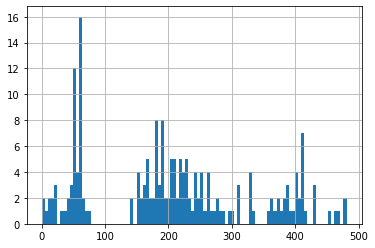

In [3]:
metadata["Number of Images"].hist(bins=100)

In [4]:
top_G=metadata["Subject ID"]
top_G=set([l[8:]for l in top_G])

In [5]:
metadata[metadata["Subject ID"]=="Lung_Dx-G0031"]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1095,1.3.6.1.4.1.14519.5.2.1.6655.2359.269178008582...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0031,1.3.6.1.4.1.14519.5.2.1.6655.2359.375418541264...,lungc,10-22-2009,A phase 5mm Stnd SS50,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,180,95.16 MB,./Lung-PET-CT-Dx/Lung_Dx-G0031/10-22-2009-NA-l...,2023-04-02T21:57:21.274
1104,1.3.6.1.4.1.14519.5.2.1.6655.2359.265088720385...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0031,1.3.6.1.4.1.14519.5.2.1.6655.2359.375418541264...,lungc,10-22-2009,5mm Lung SS50,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,60,31.72 MB,./Lung-PET-CT-Dx/Lung_Dx-G0031/10-22-2009-NA-l...,2023-04-02T21:59:18.934


In [4]:
#Transform rgb ctscan to grayscale using:(0.3 * R) + (0.59 * G) + (0.11 * B) 
def ct_to_gray(ctscan):
    r = ctscan[:,:,0]
    g = ctscan[:,:,1]
    b = ctscan[:,:,2]
    graybmp = np.multiply(0.3*r, 0.59*g)
    graybmp = np.multiply(graybmp, 0.11*b)
    return graybmp

../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0013
[[[-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  ...
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]]] (1, 512, 512) 1
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0003
[[[-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  ...
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]]] (1, 512, 512) 1
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0043
[[[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -10

KeyboardInterrupt: 

(2696, 262144) (338, 262144) (2696, 4) (338, 4)


In [5]:
###find files
import pydicom
from matplotlib import pyplot as plt
import cv2

dicom_path = "../data/manifest-1608669183333/Lung-PET-CT-Dx/"
annotation_path = "../Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020/Annotation/"
annon_files = os.listdir(annotation_path)
ctlung_files = os.listdir(dicom_path)
#variables to store data
num_classes = 4
x_all = []
y_all = []

#iterate over ct scans
for subject_name in annon_files:
    if "B" in subject_name: #use subset B only since it is small and we are running stuff locally
        annon_path = annotation_path + subject_name
        ctlung_path = dicom_path + "Lung_Dx-" + subject_name
        
        if not os.path.isdir(ctlung_path):
            print("missing file: ", ctlung_path)
            continue
        #print(ctlung_path)
        lungs = getUID_path(ctlung_path) #get dict with xml:ctscan_num 
        #print(lungs)
        annotations = XML_preprocessor(annon_path, num_classes=num_classes).data
        for k, v in annotations.items():
        
            key = k[:-4] #quitamos xml del nombre
            if key not in lungs:
                print("missing annotation file: ", k)
                continue
            image_data = v[0]
            image_data=[int(i) for i in image_data]
            
            bounding_box = [image_data[0], image_data[1], image_data[2], image_data[3]]
            #print(bounding_box)

            dcm_path, dcm_name = lungs[k[:-4]]
            dicom_image = pydicom.read_file(dcm_path)
            #print(matrix,matrix.shape,ch)
            pixel_array = dicom_image.pixel_array.astype(np.float)
            if len(pixel_array.shape) == 3: #assume bitmap is rgb
                pixel_array = ct_to_gray(pixel_array)
                
            pixel_array = pixel_array / np.max(pixel_array)
            #print(pixel_array,pixel_array.shape)
            #bw_image = np.zeros_like(pixel_array)
            #threshold=0.5
            #bw_image[pixel_array > threshold] = 1
            #del pixel_array
            #mask = np.zeros_like(pixel_array)
            #mask[image_data[1]:image_data[3], image_data[0]:image_data[2]] = 1
            #print(bw_image,bw_image.shape)
            pixel_array = np.expand_dims(pixel_array, axis=-1)
            #print(pixel_array.shape)
            #print(dcm_path)
            #plt.imshow(pixel_array, cmap='gray')
            #plt.show()
            #plt.imshow(mask, cmap='gray')
            #plt.show()
            #ctscan_map = ctscan_map.reshape(np.prod(ctscan_map.shape))/255
            #break
            x_all.append(pixel_array)

        #get xmin, ymin, xmax, ymax that define the square and will be predicted
            y_all.append(np.array([image_data[0], image_data[1], image_data[2], image_data[3]]))

x_all = np.array(x_all)
y_all = np.array(y_all)
print(x_all.shape)
print(y_all.shape)

/tmp/ipykernel_540060/1077631143.py:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixel_array = dicom_image.pixel_array.astype(np.float)


missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.469388796898719175810353557871.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.253499093725222144225669530250.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.136788945074661422691341468449.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.290562187116107174337012530942.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.264347398825533405596428888416.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.739386460021914982547403695156.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.119252578514908170756674082512.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.289795777072556464918247262981.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.218726992178117761342346852656.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.320042227231064887825199401077.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.

In [6]:
sampled_index = np.random.choice(np.array(list(range(len(x_all)))), size=1000, replace=False)
sampled_index              

array([ 458, 1814, 1002, 2079, 2032, 1653, 1114, 2959,   70, 1869, 1964,
       2517,  932,  604, 2463, 1567, 1288,  817,   64,  946, 1068, 2192,
        481, 1955, 1546, 2783, 1849, 1892, 2269,  591, 2347,  765, 2533,
       1347,  850, 2932,  663, 2562, 1668, 1693,  732,  214, 1483,  756,
       1728, 1375, 2026, 1312, 1166, 1592,  603,  490,  350, 2892, 1569,
        139, 1879, 2089, 2970,  640, 2744,  840, 1980, 1039, 2664, 2942,
        630, 2034,  712, 1181,  460,  955, 2871, 1539, 2399,  420, 2844,
       2924, 2236, 2689, 1720,  771, 2670, 2981,  329, 2610, 1266, 1436,
        294, 1162, 1338, 1969,  961, 1110, 2637, 1760, 1393, 2159, 2447,
        656,  327, 2879, 1746,  778, 2285, 2414, 2534, 1062,  499,   66,
       2083, 1305,   79, 1944, 1712, 1244, 2431, 2584, 1926, 2125, 2120,
       2057,  186,  422, 1306, 2671, 1530,  688, 1825,  739, 1723, 2777,
       2168, 1325,  397, 2862,  430, 1559, 1927, 2023, 2985, 1755, 2025,
        145, 2673, 2122, 1330, 2262, 2505, 2492, 28

In [7]:
x_all=x_all[sampled_index]
y_all=y_all[sampled_index]


In [8]:
print(x_all.shape)
print(y_all.shape)

(1000, 512, 512, 1)
(1000, 4)


In [9]:
#training, validation, and testing data sets
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(x_all, y_all, train_size = 0.8, random_state=69)


In [10]:
print(xtrain.shape,xval.shape,ytrain.shape,yval.shape)

(800, 512, 512, 1) (200, 512, 512, 1) (800, 4) (200, 4)


# Trying Torch model 

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super(AttentionBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.conv2 = nn.Conv2d(in_channels // 8, in_channels, kernel_size=1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        h = self.conv1(x)
        h = F.relu(h)
        h = self.conv2(h)
        h = self.sigmoid(h)
        return x * h
        
class ObjectDetectionModel(nn.Module):
    def __init__(self):
        super(ObjectDetectionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=2)
        self.attention = AttentionBlock(256)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.attention(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ObjectDetectionModel()

In [19]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor



# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train the model
for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

NameError: name 'train_loader' is not defined

In [ ]:
###find files
import pydicom
from matplotlib import pyplot as plt
import cv2

dicom_path = "../data/manifest-1608669183333/Lung-PET-CT-Dx/"
annotation_path = "../Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020/Annotation/"
annon_files = os.listdir(annotation_path)
ctlung_files = os.listdir(dicom_path)
#variables to store data
num_classes = 4
x_all = []
y_all = []

#iterate over ct scans
for subject_name in annon_files:
    if "B" in subject_name: #use subset B only since it is small and we are running stuff locally
        annon_path = annotation_path + subject_name
        ctlung_path = dicom_path + "Lung_Dx-" + subject_name
        
        if not os.path.isdir(ctlung_path):
            print("missing file: ", ctlung_path)
            continue
        #print(ctlung_path)
        lungs = getUID_path(ctlung_path) #get dict with xml:ctscan_num 
        #print(lungs)
        annotations = XML_preprocessor(annon_path, num_classes=num_classes).data
        for k, v in annotations.items():
        
            key = k[:-4] #quitamos xml del nombre
            if key not in lungs:
                print("missing annotation file: ", k)
                continue
            image_data = v[0]
            image_data=[int(i) for i in image_data]
            
            bounding_box = [image_data[0], image_data[1], image_data[2], image_data[3]]
            print(bounding_box)

            dcm_path, dcm_name = lungs[k[:-4]]
            dicom_image = pydicom.read_file(dcm_path)
            #print(matrix,matrix.shape,ch)
            pixel_array = dicom_image.pixel_array.astype(np.float)
            if len(pixel_array.shape) == 3: #assume bitmap is rgb
                pixel_array = ct_to_gray(pixel_array)
                
            pixel_array = pixel_array / np.max(pixel_array)
            #print(pixel_array,pixel_array.shape)
            #bw_image = np.zeros_like(pixel_array)
            #threshold=0.5
            #bw_image[pixel_array > threshold] = 1
            #del pixel_array
            mask = np.zeros_like(pixel_array)
            mask[image_data[1]:image_data[3], image_data[0]:image_data[2]] = 1
            #print(bw_image,bw_image.shape)
            pixel_array = np.expand_dims(pixel_array, axis=-1)
            print(pixel_array.shape)
            print(dcm_path)
            plt.imshow(pixel_array, cmap='gray')
            plt.show()
            plt.imshow(mask, cmap='gray')
            plt.show()
            #ctscan_map = ctscan_map.reshape(np.prod(ctscan_map.shape))/255
            break
            x_all.append(ctscan_map)

        #get xmin, ymin, xmax, ymax that define the square and will be predicted
            y_all.append(np.array([v[0][0], v[0][1], v[0][2], v[0][3]]))

x_all = np.array(x_all)
y_all = np.array(y_all)
print(x_all.shape)
print(y_all.shape)

In [ ]:
###find files
dicom_path = "../data/manifest-1608669183333/Lung-PET-CT-Dx/"
annotation_path = "../Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020/Annotation/"
annon_files = os.listdir(annotation_path)
ctlung_files = os.listdir(dicom_path)
#variables to store data
num_classes = 4
x_all = []
y_all = []

#iterate over ct scans
for subject_name in annon_files:
    if "B" in subject_name: #use subset B only since it is small and we are running stuff locally
        annon_path = annotation_path + subject_name
        ctlung_path = dicom_path + "Lung_Dx-" + subject_name
        
        if not os.path.isdir(ctlung_path):
            print("missing file: ", ctlung_path)
            continue
        print(ctlung_path)
        lungs = getUID_path(ctlung_path) #get dict with xml:ctscan_num 
        #print(lungs)
        annotations = XML_preprocessor(annon_path, num_classes=num_classes).data
        for k, v in annotations.items():
        
            key = k[:-4] #quitamos xml del nombre
            if key not in lungs:
                print("missing annotation file: ", k)
                continue
                
            dcm_path, dcm_name = lungs[k[:-4]]
            matrix, frame_num, width, height, ch = loadFile(dcm_path)
            #print(matrix,matrix.shape,ch)
            break
            #print(matrix, frame_num, width, height, ch)
            ctscan_bitmap = MatrixToImage(matrix[0], ch)
            #print(ctscan_bitmap,ctscan_bitmap.shape)
            ctscan_map = ctscan_bitmap
            if len(ctscan_bitmap.shape) > 2: #assume bitmap is rgb
                ctscan_map = ct_to_gray(ctscan_bitmap)
            #print(ctscan_map,ctscan_map.shape)
            
            #ctscan_map = ctscan_map.reshape(np.prod(ctscan_map.shape))/255
            
            x_all.append(ctscan_map)

        #get xmin, ymin, xmax, ymax that define the square and will be predicted
            y_all.append(np.array([v[0][0], v[0][1], v[0][2], v[0][3]]))

x_all = np.array(x_all)
y_all = np.array(y_all)
print(x_all.shape)
print(y_all.shape)